In [4]:
import pandas as pd

# Load the data
data = pd.read_csv("../data/sample_output/saved_new_data.csv", )

# Display the first few rows of the dataframe
data.head()

,Unnamed: 0,0,1,2,3,4,5,6,7,8,...,54,55,56,57,58,59,60,61,62,63
0,0,609.75,594.50,593.00,563.25,555.50,547.00,518.50,519.5,508.75,...,140.25,108.50,105.50,113.50,112.75,69.00,89.75,51.75,-8178.75,-8179.50
1,1,-230.75,-167.75,-170.50,-221.75,-203.50,-202.50,-174.00,-181.5,-175.25,...,-688.00,-650.25,-640.50,-683.75,-675.50,-836.50,-669.75,-867.25,-8175.75,-8176.50
2,2,-941.75,-840.50,-829.50,-876.00,-845.50,-845.75,-771.25,-780.0,-769.50,...,-1216.75,-1142.50,-1133.25,-1198.50,-1195.25,-1407.75,-1165.50,-1440.50,-8172.75,-8173.25
3,3,-1284.25,-1189.50,-1183.75,-1209.25,-1166.75,-1163.25,-1083.50,-1058.5,-1075.25,...,-1400.25,-1305.50,-1291.00,-1360.50,-1359.25,-1579.50,-1309.25,-1600.25,8191.75,-2930.25
4,4,-1145.50,-1077.25,-1066.75,-1066.25,-1029.75,-1027.50,-958.75,-944.0,-954.25,...,-896.25,-836.75,-821.25,-862.50,-861.75,-967.00,-821.50,-974.00,8191.75,8191.75


# Time series plot

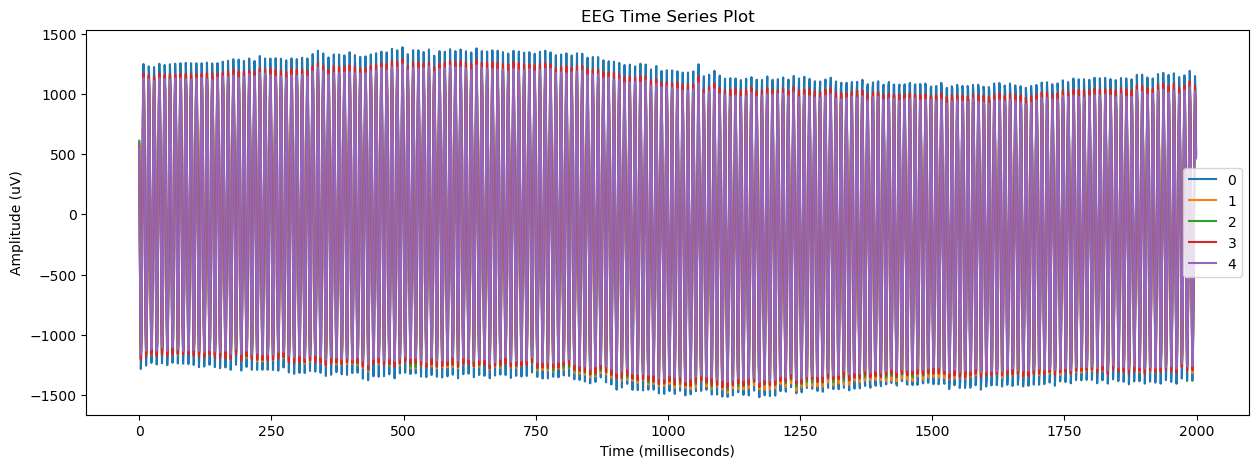

In [5]:
import matplotlib.pyplot as plt

# Assuming each column is a channel and the first column is time or index
channels = data.columns[1:]  # Adjust if your format includes a time/index column
sampling_rate = 1000  # Example: 1000 Hz, adjust as per your setup

# Plot the first few seconds of EEG data for the first few channels
plt.figure(figsize=(15, 5))
for channel in channels[:5]:  # Adjust the slice for more/less channels
    plt.plot(data[channel][:sampling_rate * 2], label=channel)  # Plotting first 2 seconds

plt.title('EEG Time Series Plot')
plt.xlabel('Time (milliseconds)')
plt.ylabel('Amplitude (uV)')
plt.legend()
plt.show()


# Spectral plot

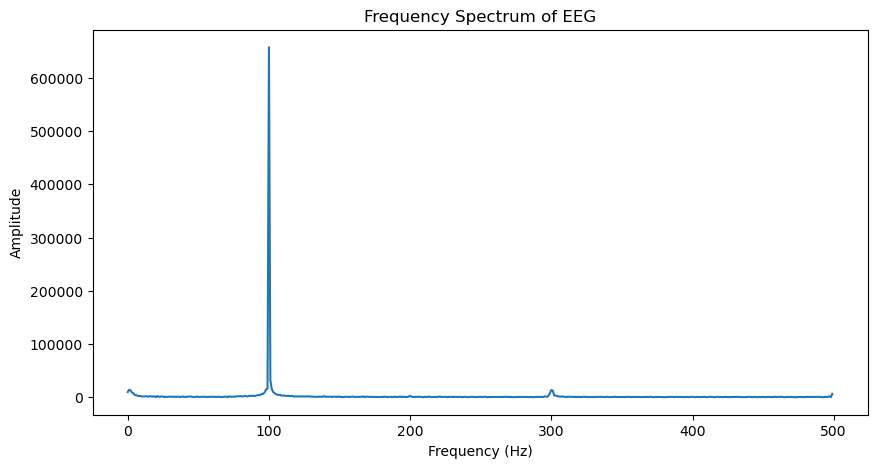

In [6]:
import numpy as np

# Assuming using the first channel for demonstration
fft_output = np.fft.fft(data[channels[0]][:sampling_rate])  # Use one second of data
frequencies = np.fft.fftfreq(sampling_rate, 1/sampling_rate)

# Plot the frequency spectrum
plt.figure(figsize=(10, 5))
plt.plot(frequencies[:len(frequencies)//2], np.abs(fft_output)[:len(frequencies)//2])
plt.title('Frequency Spectrum of EEG')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Amplitude')
plt.show()


# Topographical Map

In [ ]:
# !pip install mne

In [ ]:
# import mne

# # Assuming the first column is an index and others are EEG channels
# channels = data.columns[1:]  # Adjust if different
# sampling_rate = 1000  # Adjust this according to your data specifics

# # Create an Info object (without the montage parameter)
# info = mne.create_info(ch_names=list(channels), sfreq=sampling_rate, ch_types='eeg')

# # Create the RawArray
# raw = mne.io.RawArray(data[channels].values.T, info)  # Transpose data to fit (n_channels, n_times)

# # Define the montage (electrode positions), assuming standard 10-20 system
# montage = mne.channels.make_standard_montage('standard_1020')
# raw.set_montage(montage)  # Set the montage

# # Plotting the topographical map of EEG data
# raw.plot_psd(tmax=np.inf)  # PSD plot
# raw.plot_projs_topomap()  # Topomap plot


In [7]:
# Example mapping: Adjust according to your actual electrode layout
channel_map = {
    '0': 'Fp1', '1': 'Fpz', '2': 'Fp2', '3': 'F7', '4': 'F3', '5': 'Fz', '6': 'F4', '7': 'F8',
    '8': 'FC5', '9': 'FC1', '10': 'FC2', '11': 'FC6', '12': 'M1', '13': 'T7', '14': 'C3', '15': 'Cz',
    '16': 'C4', '17': 'T8', '18': 'M2', '19': 'CP5', '20': 'CP1', '21': 'CP2', '22': 'CP6', '23': 'P7',
    '24': 'P3', '25': 'Pz', '26': 'P4', '27': 'P8', '28': 'POz', '29': 'O1', '30': 'Oz', '31': 'O2',
    '32': 'AF7', '33': 'AF3', '34': 'AF4', '35': 'AF8', '36': 'F5', '37': 'F1', '38': 'F2', '39': 'F6',
    '40': 'FT7', '41': 'FC3', '42': 'FC4', '43': 'FT8', '44': 'TP7', '45': 'C5', '46': 'C1', '47': 'C2',
    '48': 'C6', '49': 'TP8', '50': 'CP3', '51': 'CP4', '52': 'P5', '53': 'P1', '54': 'P2', '55': 'P6',
    '56': 'PO5', '57': 'PO3', '58': 'PO4', '59': 'PO6', '60': 'CB1', '61': 'CB2', '62': 'S1', '63': 'S2'
}

# Rename channels
data.rename(columns=channel_map, inplace=True, index=None)

In [8]:
data.head()

,Unnamed: 0,Fp1,Fpz,Fp2,F7,F3,Fz,F4,F8,FC5,...,P2,P6,PO5,PO3,PO4,PO6,CB1,CB2,S1,S2
0,0,609.75,594.50,593.00,563.25,555.50,547.00,518.50,519.5,508.75,...,140.25,108.50,105.50,113.50,112.75,69.00,89.75,51.75,-8178.75,-8179.50
1,1,-230.75,-167.75,-170.50,-221.75,-203.50,-202.50,-174.00,-181.5,-175.25,...,-688.00,-650.25,-640.50,-683.75,-675.50,-836.50,-669.75,-867.25,-8175.75,-8176.50
2,2,-941.75,-840.50,-829.50,-876.00,-845.50,-845.75,-771.25,-780.0,-769.50,...,-1216.75,-1142.50,-1133.25,-1198.50,-1195.25,-1407.75,-1165.50,-1440.50,-8172.75,-8173.25
3,3,-1284.25,-1189.50,-1183.75,-1209.25,-1166.75,-1163.25,-1083.50,-1058.5,-1075.25,...,-1400.25,-1305.50,-1291.00,-1360.50,-1359.25,-1579.50,-1309.25,-1600.25,8191.75,-2930.25
4,4,-1145.50,-1077.25,-1066.75,-1066.25,-1029.75,-1027.50,-958.75,-944.0,-954.25,...,-896.25,-836.75,-821.25,-862.50,-861.75,-967.00,-821.50,-974.00,8191.75,8191.75


In [9]:
data.drop('Unnamed: 0', inplace=True, axis=1)

In [10]:
data.head()

,Fp1,Fpz,Fp2,F7,F3,Fz,F4,F8,FC5,FC1,...,P2,P6,PO5,PO3,PO4,PO6,CB1,CB2,S1,S2
0,609.75,594.50,593.00,563.25,555.50,547.00,518.50,519.5,508.75,563.25,...,140.25,108.50,105.50,113.50,112.75,69.00,89.75,51.75,-8178.75,-8179.50
1,-230.75,-167.75,-170.50,-221.75,-203.50,-202.50,-174.00,-181.5,-175.25,-224.25,...,-688.00,-650.25,-640.50,-683.75,-675.50,-836.50,-669.75,-867.25,-8175.75,-8176.50
2,-941.75,-840.50,-829.50,-876.00,-845.50,-845.75,-771.25,-780.0,-769.50,-882.75,...,-1216.75,-1142.50,-1133.25,-1198.50,-1195.25,-1407.75,-1165.50,-1440.50,-8172.75,-8173.25
3,-1284.25,-1189.50,-1183.75,-1209.25,-1166.75,-1163.25,-1083.50,-1058.5,-1075.25,-1227.75,...,-1400.25,-1305.50,-1291.00,-1360.50,-1359.25,-1579.50,-1309.25,-1600.25,8191.75,-2930.25
4,-1145.50,-1077.25,-1066.75,-1066.25,-1029.75,-1027.50,-958.75,-944.0,-954.25,-1086.50,...,-896.25,-836.75,-821.25,-862.50,-861.75,-967.00,-821.50,-974.00,8191.75,8191.75


In [11]:
import mne
# Select only the columns that are actually mapped (ignores unmapped channels)
channels_to_use = [channel for channel in channel_map.values() if channel in data.columns]

# Create an MNE Info object with the channels that we have data for
info = mne.create_info(ch_names=channels_to_use, sfreq=1000, ch_types='eeg')

# Create the RawArray with the data from the channels we are using
raw = mne.io.RawArray(data[channels_to_use].T.to_numpy(), info)

# Define the montage (electrode positions)
montage = mne.channels.make_standard_montage('standard_1020')

# Set the montage, ignoring channels that are not present in the montage
raw.set_montage(montage, on_missing='ignore')

# Visualize the data
raw.plot_psd(fmax=50)  # Showing PSD up to 50 Hz
# raw.plot_projs_topomap()  # Topomap

Creating RawArray with float64 data, n_channels=64, n_times=5005
    Range : 0 ... 5004 =      0.000 ...     5.004 secs
Ready.
NOTE: plot_psd() is a legacy function. New code should use .compute_psd().plot().
Effective window size : 2.048 (s)
Plotting power spectral density (dB=True).


/tmp/ipykernel_31252/4063271711.py:18: FutureWarning: The value of `amplitude='auto'` will be removed in MNE 1.8.0, and the new default will be `amplitude=False`.
  raw.plot_psd(fmax=50)  # Showing PSD up to 50 Hz
/home/testys/anaconda3/lib/python3.11/site-packages/mne/viz/utils.py:167: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  (fig or plt).show(**kwargs)


AttributeError: 'NoneType' object has no attribute '_get_renderer'

<MNELineFigure size 1000x350 with 2 Axes>

AttributeError: 'NoneType' object has no attribute '_get_renderer'

<MNELineFigure size 1000x350 with 2 Axes>